In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

In [3]:
data = datasets.load_breast_cancer()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
df = pd.DataFrame(data['data'])

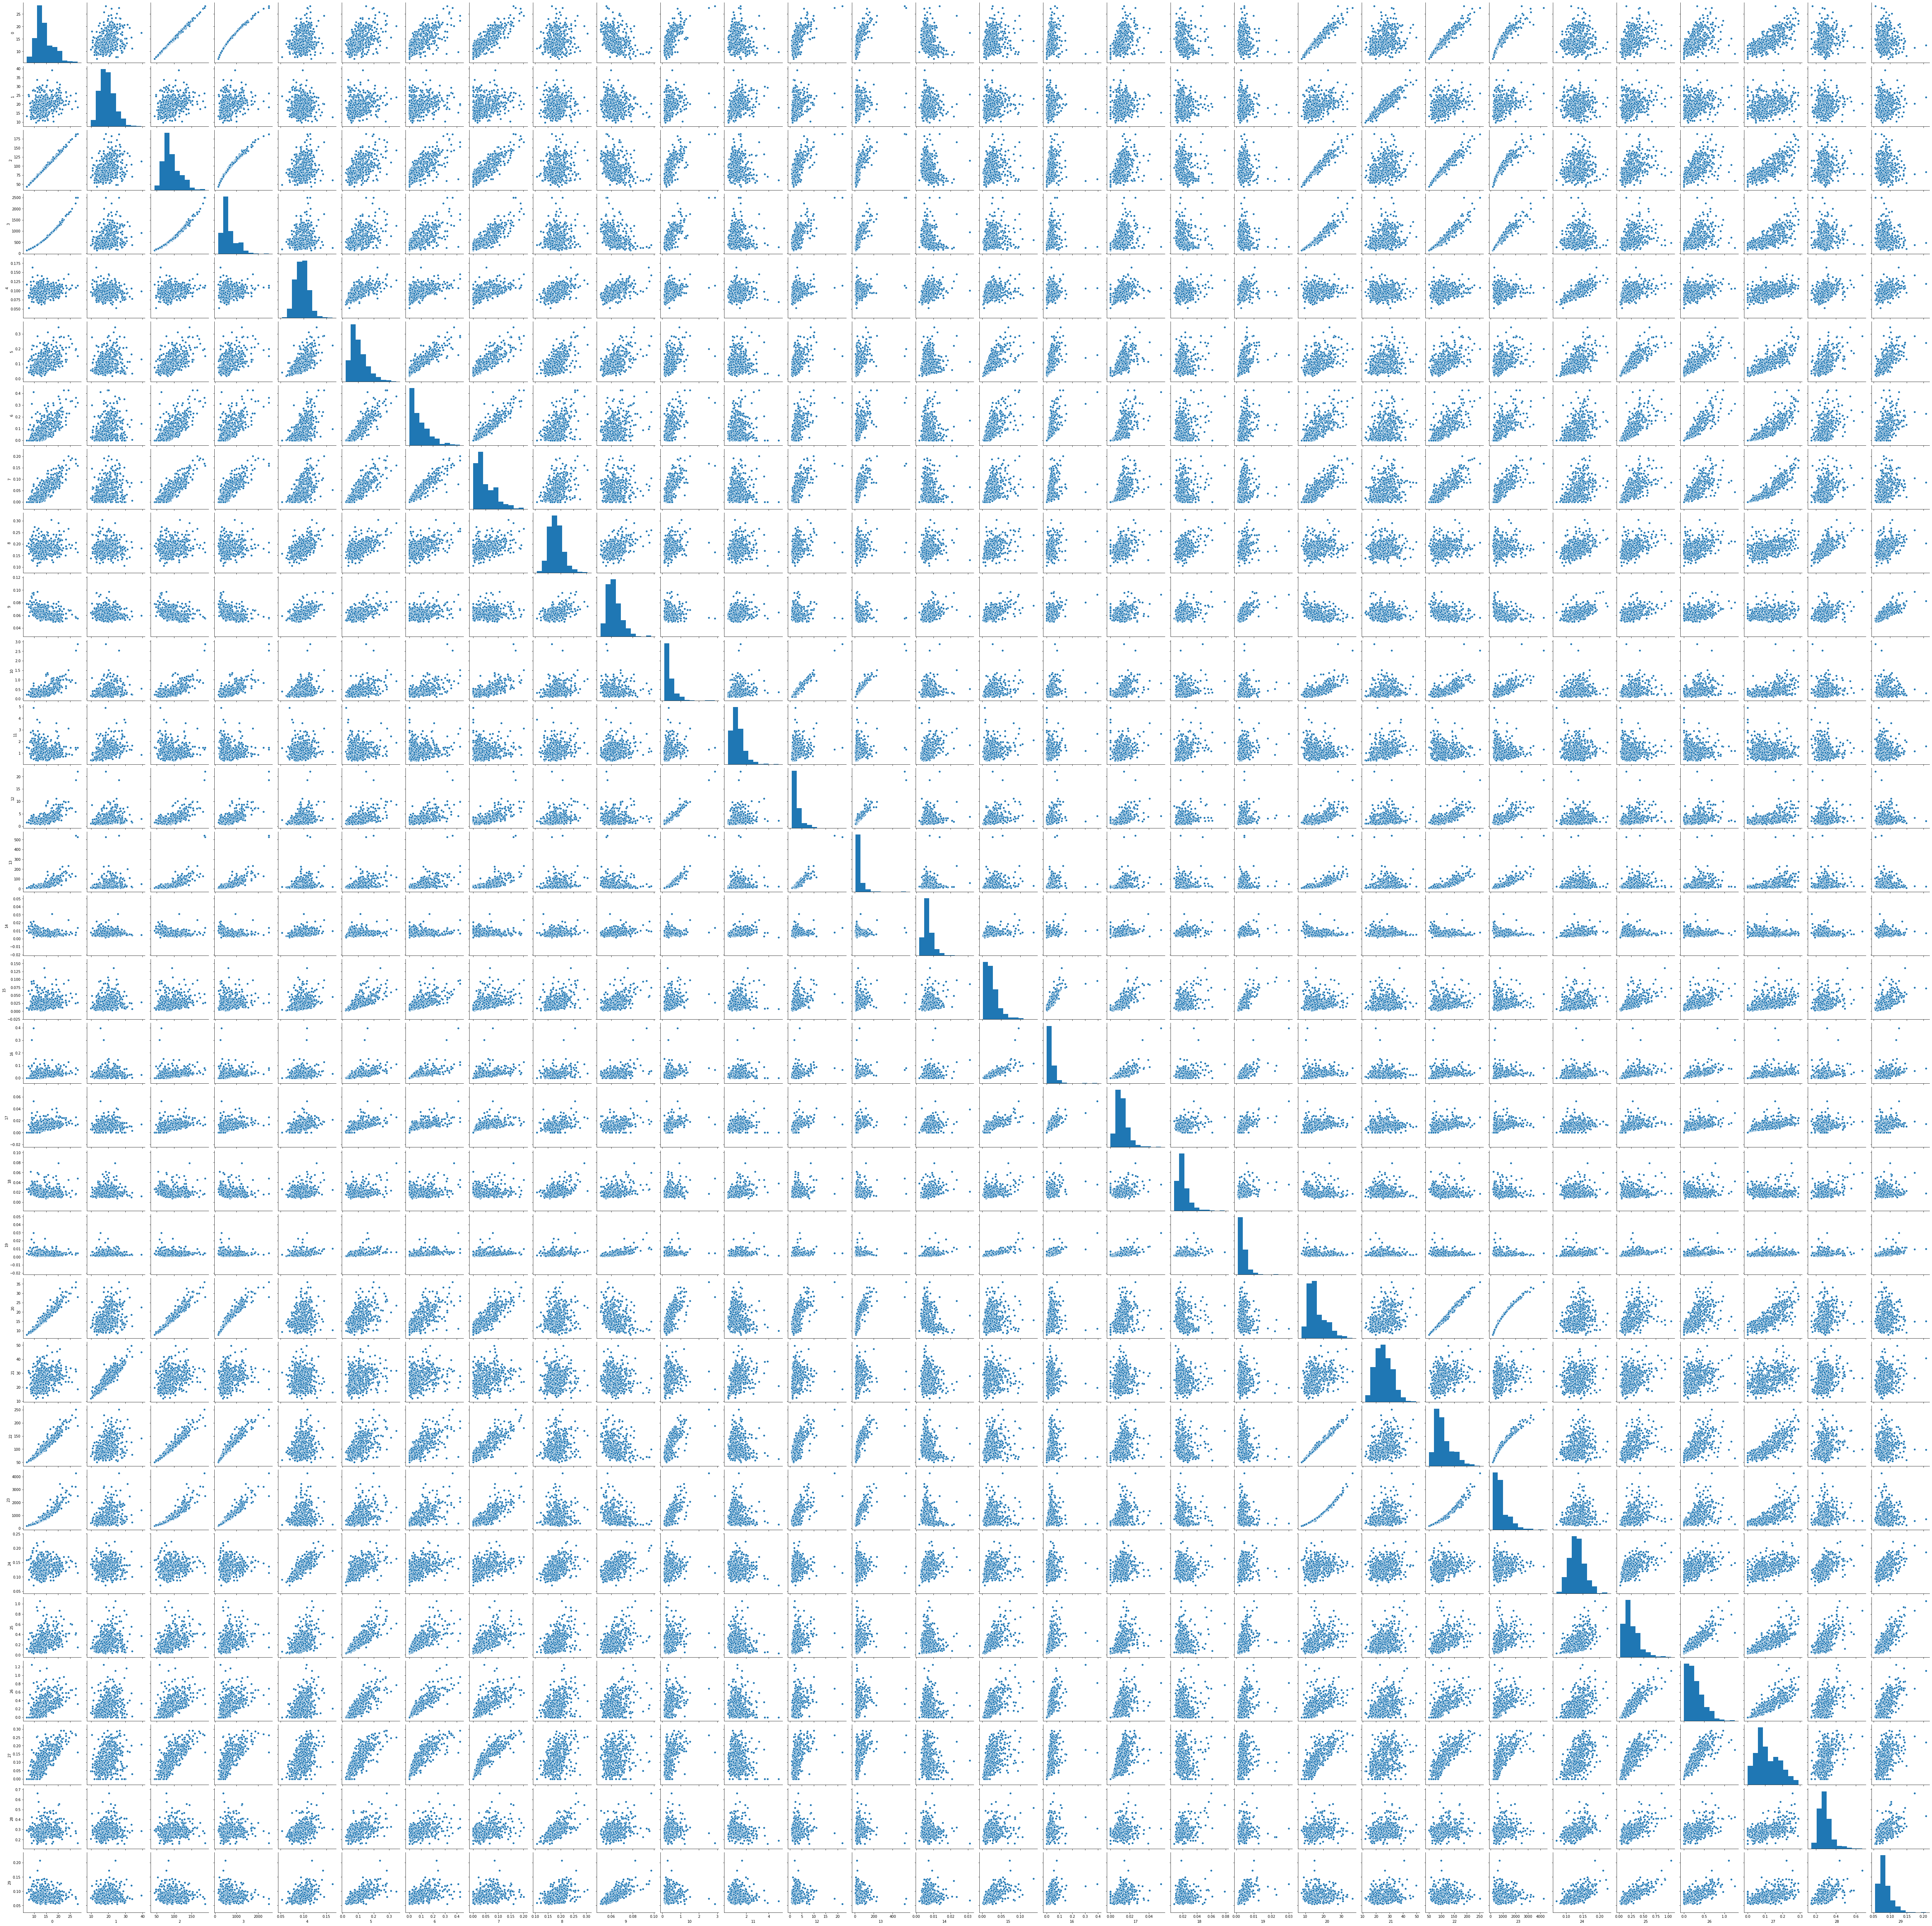

In [6]:
sns.pairplot(df)

In [7]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
df = pd.DataFrame(data=data['data'],columns=data['feature_names'])

In [9]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [10]:
df['mal-ben']=data['target']

In [11]:
df.count()

mean radius                569
mean texture               569
mean perimeter             569
mean area                  569
mean smoothness            569
mean compactness           569
mean concavity             569
mean concave points        569
mean symmetry              569
mean fractal dimension     569
radius error               569
texture error              569
perimeter error            569
area error                 569
smoothness error           569
compactness error          569
concavity error            569
concave points error       569
symmetry error             569
fractal dimension error    569
worst radius               569
worst texture              569
worst perimeter            569
worst area                 569
worst smoothness           569
worst compactness          569
worst concavity            569
worst concave points       569
worst symmetry             569
worst fractal dimension    569
mal-ben                    569
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=df.drop('mal-ben',axis=1)

In [14]:
y=df['mal-ben']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [17]:
logmod = LogisticRegression(max_iter=200)
dectre = DecisionTreeClassifier(max_depth=10)
ranfor = RandomForestClassifier(n_estimators=200)
gbc = GradientBoostingClassifier(n_estimators=200)

In [18]:
logmod.fit(X_train,y_train)
dectre.fit(X_train,y_train)
ranfor.fit(X_train,y_train)
gbc.fit(X_train,y_train)

C:\Users\gelelety\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GradientBoostingClassifier(n_estimators=200)

In [19]:
logmodpred = logmod.predict(X_test)
dectrepred = dectre.predict(X_test)
ranforpred = ranfor.predict(X_test)
gbcpred = gbc.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
print('logistic regression')
print(confusion_matrix(y_test,logmodpred))
print('decision tree')
print(confusion_matrix(y_test,dectrepred))
print('random forest')
print(confusion_matrix(y_test,ranforpred))
print('gbc')
print(confusion_matrix(y_test,gbcpred))

logistic regression
[[16  1]
 [ 0 40]]
decision tree
[[14  3]
 [ 3 37]]
random forest
[[16  1]
 [ 1 39]]
gbc
[[16  1]
 [ 1 39]]


In [ ]:
#from this matrices, we can see that simple logistic regression works best... at least for this
#This is not a complete work - just a quick compare of different method of ML